## **Google Drive 마운트**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
base_path = '/content/drive/MyDrive/StyleTransform/DATA'
os.chdir(base_path)

In [ ]:
!pwd

/content/drive/MyDrive/StyleTransform/DATA


## **필요한 라이브러리 import**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
from PIL import Image, ImageColor
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import animation


import random
from tqdm import tqdm

from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors

## **Clustering 함수**

In [ ]:
def color_analysis(img):
    clf = KMeans(n_clusters = 3)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_

    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]

    return counts, hex_colors


def prep_image(raw_img):
    modified_img = raw_img.reshape(raw_img.shape[0]*raw_img.shape[1], 3)
    return modified_img


def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

## **이미지 불러오기**

In [ ]:
img_path = '/content/drive/MyDrive/StyleTransform/DATA/facestyle1_10000'

img_files = [os.path.join(img_path, f) for f in os.listdir(img_path) if f.endswith('.png') or f.endswith('.jpg')]
img_files.sort()

## **Image Cluster 추출 및 시각화 V2**

***참고링크 : https://jehyunlee.github.io/2021/07/10/Python-DS-80-mpl3d2/***

In [ ]:
rgb_collects = []
rgb_cnts = []

for img_file in tqdm(img_files):

    img_bgr = cv2.imread(img_file)
    img_rgb = img_bgr[:,:,::-1]

    modified_image = prep_image(img_rgb)
    counts, hex_colors = color_analysis(modified_image)

    for i, hex_color in enumerate(hex_colors):
        rgb_collect = ImageColor.getcolor(hex_color, 'RGB')
        rgb_cnt = list(counts.values())

        rgb_collects.append(rgb_collect)
        rgb_cnts.append(rgb_cnt[i])

100%|██████████| 10000/10000 [2:12:33<00:00,  1.26it/s]


In [ ]:
data = {'rgb_collects':rgb_collects, 'rgb_cnts':rgb_cnts}

In [ ]:
df = pd.DataFrame(data)
df

,rgb_collects,rgb_cnts
0,"(79, 68, 67)",36960
1,"(220, 157, 129)",5452
2,"(184, 160, 197)",23124
3,"(103, 145, 184)",34273
4,"(239, 232, 225)",17650
...,...,...
29995,"(35, 24, 20)",8920
29996,"(105, 87, 77)",14655
29997,"(251, 224, 213)",16151
29998,"(129, 91, 75)",11254


In [ ]:
df_ = df.groupby('rgb_collects')['rgb_cnts'].sum()
# df_c = df.groupby('rgb_collects')['rgb_cnts'].count()
df_

rgb_collects
(1, 1, 1)            89476
(2, 2, 2)            25932
(3, 1, 1)            35191
(3, 2, 1)             5925
(3, 2, 2)            36894
                    ...   
(254, 253, 252)      51584
(254, 253, 253)     554163
(254, 254, 252)      39561
(254, 254, 253)     824313
(254, 254, 254)    2033891
Name: rgb_cnts, Length: 21911, dtype: int64

In [ ]:
df_re = round(df_ * 500 / df_.max())
df_re

rgb_collects
(1, 1, 1)           22.0
(2, 2, 2)            6.0
(3, 1, 1)            9.0
(3, 2, 1)            1.0
(3, 2, 2)            9.0
                   ...  
(254, 253, 252)     13.0
(254, 253, 253)    136.0
(254, 254, 252)     10.0
(254, 254, 253)    203.0
(254, 254, 254)    500.0
Name: rgb_cnts, Length: 21911, dtype: float64

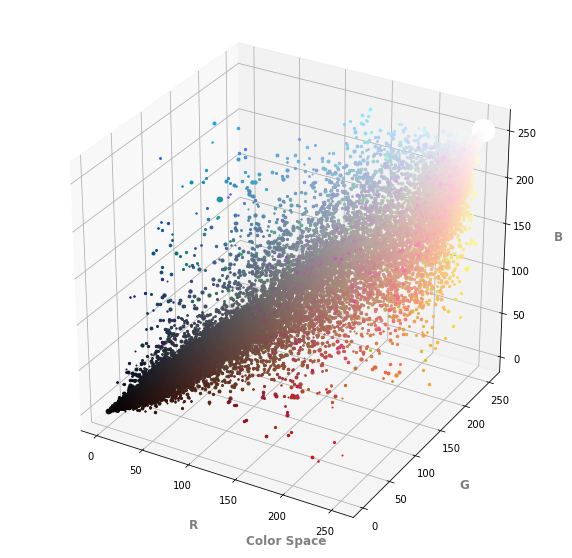

In [ ]:
fig, axes = plt.subplots(ncols=1, figsize=(10,10), subplot_kw={'projection':'3d'})
fontlabel = {'fontsize':'large', 'color':'gray', 'fontweight':'bold'}

# list_x, list_y, list_z = [], [], []

for i, df_rgb in enumerate(df_re.index):
    x, y, z = df_rgb[0], df_rgb[1], df_rgb[2]

    axes.set_xlabel('R', fontdict=fontlabel, labelpad=16)
    axes.set_ylabel('G', fontdict=fontlabel, labelpad=16)
    axes.set_zlabel('B', fontdict=fontlabel, labelpad=16)
    axes.set_title('Color Space', fontdict=fontlabel)

    # scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
    # 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
    # marker = 점의 형태
    # s = 점의 크기
    # c = 점의 색깔
    
    axes.scatter(x,y,z, marker='o', s=df_re[i], c=rgb_to_hex(df_re.index[i])) 

plt.show()

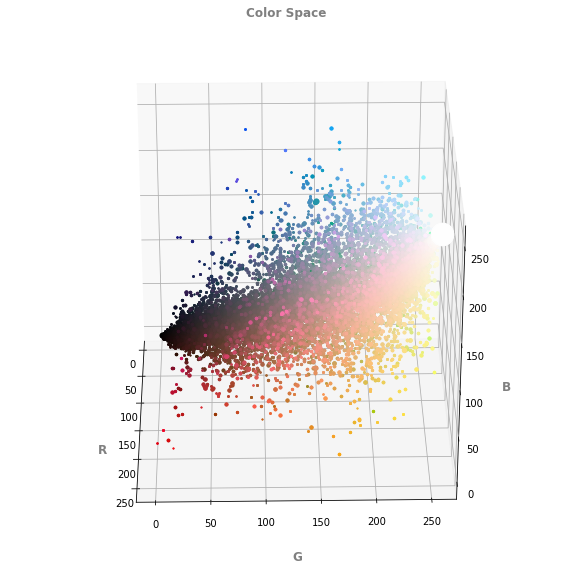

In [ ]:
fig, axes = plt.subplots(ncols=1, figsize=(10,10), subplot_kw={'projection':'3d'})
fontlabel = {'fontsize':'large', 'color':'gray', 'fontweight':'bold'}

def init():
    
    axes.set_xlabel('R', fontdict=fontlabel, labelpad=16)
    axes.set_ylabel('G', fontdict=fontlabel, labelpad=16)
    axes.set_zlabel('B', fontdict=fontlabel, labelpad=16)
    axes.set_title('Color Space]', fontdict=fontlabel)
    
    for i, df_rgb in enumerate(df_re.index):
        x, y, z = df_rgb[0], df_rgb[1], df_rgb[2]
        axes.scatter(x,y,z, marker='o', s=df_re[i], c=rgb_to_hex(df_re.index[i])) 

    return fig,

def animate(i):
    axes.view_init(elev=30, azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=360, interval=20, blit=True)

# save
anim.save('mpl3d_scatter_facestyle1_10000.gif', writer='pillow', fps=30)
# plt.show()